# Power grid example case 39: New England Noisy version


$\Gamma = 0$,

__case-39 New England__

Node configuration: 10 Generators + 10 Terminals + 29 Loads

Perburbations = large

Splitting time-series according to perturbation points

$\Gamma = 0$,

Perburbations = large

Splitting time-series according to perturbation points

In [1]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import warnings
pd.set_option('display.float_format', '{:0.8f}'.format)
import operator

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.sparse import coo_array

from os import path

## Loading data

In [2]:
#Name of the folder with the time series and other files
folder_name_1 = "case39bus9gen_halfperturb"
# folder_name_1 = "case39bus10gen_onetenthperturb"
# folder_name_1 = "case_39bus10gen_newengland"

#Name that needs to be appending to the beginning of other files
folder_name = "case_39bus10gen_newengland"
folder_location = path.join("powergrid","Datasets", folder_name_1)

data_matrix_df_1 = pd.read_csv(path.join(folder_location, "{}_trimmed_time_series.csv".format(folder_name)))

data_matrix_df_2 = pd.read_csv(path.join(folder_location, "{}_trimmed_time_series.csv".format(folder_name)))

data_matrix_df_3 = pd.read_csv(path.join(folder_location, "{}_trimmed_time_series.csv".format(folder_name)))

#### Reading time series data and skipping rows to sub sample

In [3]:
# #Trimming original time series to reduce the number of data points
# data_matrix_df_orig = pd.read_csv(path.join(folder_location, "{}_timeseries.csv".format(folder_name)))
# skip_n_rows_btw = 10
# rows_to_keep = np.arange(0, len(data_matrix_df_orig), skip_n_rows_btw)

# data_matrix_df = data_matrix_df_orig.iloc[rows_to_keep].reset_index(drop=True)

# data_matrix_df.to_csv(path.join(folder_location, "{}_trimmed_time_series.csv".format(folder_name)), index=False)

In [4]:
data_matrix_df = pd.read_csv(path.join(folder_location, "{}_trimmed_time_series.csv".format(folder_name)))

In [5]:
data_matrix_df

,time,PhaseGen1,PhaseGen2,PhaseGen3,PhaseGen4,PhaseGen5,PhaseGen6,PhaseGen7,PhaseGen8,PhaseGen9,...,ReactivePowerLoad20,ReactivePowerLoad21,ReactivePowerLoad22,ReactivePowerLoad23,ReactivePowerLoad24,ReactivePowerLoad25,ReactivePowerLoad26,ReactivePowerLoad27,ReactivePowerLoad28,ReactivePowerLoad29
0,0.00000000,-0.10549836,0.00000000,0.01107847,0.01988585,-0.00398084,0.05276848,0.09987475,-0.00809098,0.09006077,...,-1.28326173,-1.45722942,-0.41494594,-1.22979590,0.71957610,-0.82294700,-0.36920976,-0.79869356,-0.40498421,-0.69750703
1,0.01000000,-0.10269486,0.00215632,0.01326875,0.02181531,-0.00210533,0.05458524,0.10150276,-0.00600223,0.09160471,...,-1.13479435,-1.34787476,-0.35551717,-1.22114607,0.78925001,-0.74121688,-0.31949483,-0.78765625,-0.36882503,-0.72551123
2,0.02000000,-0.09545429,0.00756360,0.01893926,0.02631647,0.00208856,0.05897073,0.10529431,-0.00095893,0.09519037,...,-1.09853970,-1.27376111,-0.22432134,-1.08473695,0.83813276,-0.65538668,-0.26850958,-0.77711736,-0.33502783,-0.55410787
3,0.03000000,-0.08564310,0.01493089,0.02676667,0.03221558,0.00748273,0.06476093,0.11028691,0.00573889,0.09989000,...,-1.07335208,-1.21943073,-0.12427744,-0.98535638,0.87399136,-0.58778687,-0.22853211,-0.76852802,-0.30987653,-0.42982772
4,0.04000000,-0.07445209,0.02340240,0.03579735,0.03885866,0.01351362,0.07122609,0.11589825,0.01331926,0.10514830,...,-1.05596633,-1.18246469,-0.05519915,-0.91883462,0.89833953,-0.53964158,-0.20072695,-0.76236011,-0.29308620,-0.34813670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,199.95010000,1.05196476,1.14026753,1.13409500,1.20381481,1.20738337,1.22901480,1.31980982,1.15012297,1.24845610,...,-1.00288229,-1.10580180,0.02076014,-0.69192503,0.96409456,-0.51776113,-0.17672019,-0.75884919,-0.27717042,-0.28030740
19997,199.96010000,1.06063329,1.12065362,1.14548786,1.20830751,1.19677988,1.23406638,1.31018707,1.15421036,1.24219627,...,-1.01638785,-1.10516863,0.03460225,-0.72427632,0.96002022,-0.51418594,-0.18536137,-0.75930028,-0.28306292,-0.30178204
19998,199.97010000,1.06975021,1.10201430,1.15723290,1.21275168,1.18619338,1.23899627,1.30024401,1.15847973,1.23612258,...,-1.02891525,-1.10497773,0.04858577,-0.75670784,0.95561201,-0.50993517,-0.19329383,-0.75971185,-0.28869896,-0.32249712
19999,199.98010000,1.07915687,1.08461416,1.16915130,1.21704489,1.17578305,1.24369634,1.29014408,1.16289807,1.23029168,...,-1.04027914,-1.10525658,0.06241200,-0.78859518,0.95094523,-0.50501352,-0.20045776,-0.76008073,-0.29403004,-0.34226330


In [6]:
def get_node_index(label):
    if len(label) >0 and label[-1].isnumeric():
        return get_node_index(label[:-1]) + label[-1]
    else:
        return ""

def node_label_changer(column_label):
    node_index = get_node_index(column_label)
    if "PhaseGenTerm" in column_label:
        new_label = "Phi_T_{}".format(node_index)
    elif "PhaseGen" in column_label:
        new_label = "Phi_G_{}".format(node_index)
    elif "PhaseLoad" in column_label:
        new_label = "Phi_L_{}".format(node_index)
    elif "FreqGenTerm" in column_label:
        new_label = "om_T_{}".format(node_index)
    elif "FreqGen" in column_label:
        new_label = "om_G_{}".format(node_index)
    elif "FreqLoad" in column_label:
        new_label = "om_L_{}".format(node_index)
    elif "ActivePowerGenTerm" in column_label:
        new_label = "P_T_{}".format(node_index)
    elif "ActivePowerGen" in column_label:
        new_label = "P_G_{}".format(node_index)
    elif "ActivePowerLoad" in column_label:
        new_label = "P_L_{}".format(node_index)
    elif "ReactivePowerGenTerm" in column_label:
        new_label = "Q_T_{}".format(node_index)
    elif "ReactivePowerGen" in column_label:
        new_label = "Q_G_{}".format(node_index)
    elif "ReactivePowerLoad" in column_label:
        new_label = "Q_L_{}".format(node_index)
    else:
        new_label = column_label
    return new_label

In [7]:
column_label_dict = {column: node_label_changer(column) for column in data_matrix_df.columns}
column_label_dict

{'time': 'time',
 'PhaseGen1': 'Phi_G_1',
 'PhaseGen2': 'Phi_G_2',
 'PhaseGen3': 'Phi_G_3',
 'PhaseGen4': 'Phi_G_4',
 'PhaseGen5': 'Phi_G_5',
 'PhaseGen6': 'Phi_G_6',
 'PhaseGen7': 'Phi_G_7',
 'PhaseGen8': 'Phi_G_8',
 'PhaseGen9': 'Phi_G_9',
 'PhaseGen10': 'Phi_G_10',
 'PhaseGenTerm1': 'Phi_T_1',
 'PhaseGenTerm2': 'Phi_T_2',
 'PhaseGenTerm3': 'Phi_T_3',
 'PhaseGenTerm4': 'Phi_T_4',
 'PhaseGenTerm5': 'Phi_T_5',
 'PhaseGenTerm6': 'Phi_T_6',
 'PhaseGenTerm7': 'Phi_T_7',
 'PhaseGenTerm8': 'Phi_T_8',
 'PhaseGenTerm9': 'Phi_T_9',
 'PhaseGenTerm10': 'Phi_T_10',
 'PhaseLoad1': 'Phi_L_1',
 'PhaseLoad2': 'Phi_L_2',
 'PhaseLoad3': 'Phi_L_3',
 'PhaseLoad4': 'Phi_L_4',
 'PhaseLoad5': 'Phi_L_5',
 'PhaseLoad6': 'Phi_L_6',
 'PhaseLoad7': 'Phi_L_7',
 'PhaseLoad8': 'Phi_L_8',
 'PhaseLoad9': 'Phi_L_9',
 'PhaseLoad10': 'Phi_L_10',
 'PhaseLoad11': 'Phi_L_11',
 'PhaseLoad12': 'Phi_L_12',
 'PhaseLoad13': 'Phi_L_13',
 'PhaseLoad14': 'Phi_L_14',
 'PhaseLoad15': 'Phi_L_15',
 'PhaseLoad16': 'Phi_L_16',
 'PhaseLo

In [8]:
# new_column_names = ["time", "Phi_0", "Phi_1", "Phi_2", "Phi_3", "Phi_4", "Phi_5",
#                    "om_0", "om_1", "om_2", "om_3","om_4", "om_5", "P_0", "P_1", "P_2", "P_3", "P_4", "P_5",
#                    "Q_0", "Q_1", "Q_2", "Q_3", "Q_4", "Q_5"]

#Renaming the state variables for compactness
data_matrix_df.rename(columns= column_label_dict, inplace=True)

In [9]:
power_features = [feature for feature in data_matrix_df.columns if "P_" in feature]
freq_features = [feature for feature in data_matrix_df.columns if "om_" in feature]
phase_features = [feature for feature in data_matrix_df.columns if "Phi_" in feature]

K_features = [feature[2:] for feature in power_features]

In [10]:
#Removing Reactive power from the timeseries they are not needed for fitting 
non_reactive_columns = [column for column in data_matrix_df.columns if "Q" not in column]

data_matrix_df = data_matrix_df[non_reactive_columns]

In [11]:
data_matrix_df

,time,Phi_G_1,Phi_G_2,Phi_G_3,Phi_G_4,Phi_G_5,Phi_G_6,Phi_G_7,Phi_G_8,Phi_G_9,...,P_L_20,P_L_21,P_L_22,P_L_23,P_L_24,P_L_25,P_L_26,P_L_27,P_L_28,P_L_29
0,0.00000000,-0.10549836,0.00000000,0.01107847,0.01988585,-0.00398084,0.05276848,0.09987475,-0.00809098,0.09006077,...,0.22086020,-0.00000000,-3.96777289,-4.07945764,-0.00000000,0.36808880,-0.00000000,-0.00000000,-0.00000000,-6.07894876
1,0.01000000,-0.10269486,0.00215632,0.01326875,0.02181531,-0.00210533,0.05458524,0.10150276,-0.00600223,0.09160471,...,-6.05362283,-1.78950513,0.72158895,-1.75014630,-2.01174773,-1.25994248,-0.29974895,-1.60082364,-1.21946664,-2.15275272
2,0.02000000,-0.09545429,0.00756360,0.01893926,0.02631647,0.00208856,0.05897073,0.10529431,-0.00095893,0.09519037,...,-6.46513648,-2.19256577,0.41051424,-2.06218877,-2.46739982,-1.71408226,-0.77464965,-2.11973911,-1.58200928,-2.45290647
3,0.03000000,-0.08564310,0.01493089,0.02676667,0.03221558,0.00748273,0.06476093,0.11028691,0.00573889,0.09989000,...,-6.64110690,-2.44216297,0.21364137,-2.25946849,-2.74421317,-1.96628110,-1.05683700,-2.42941579,-1.80814162,-2.64030250
4,0.04000000,-0.07445209,0.02340240,0.03579735,0.03885866,0.01351362,0.07122609,0.11589825,0.01331926,0.10514830,...,-6.74056793,-2.59414682,0.09422814,-2.37922590,-2.91307731,-2.11443679,-1.22486568,-2.61522831,-1.94284544,-2.75174648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,199.95010000,1.05196476,1.14026753,1.13409500,1.20381481,1.20738337,1.22901480,1.31980982,1.15012297,1.24845610,...,-6.76208716,-2.74260963,-0.00371067,-2.46154612,-3.08534370,-2.27366831,-1.38806344,-2.81131787,-2.02687254,-2.79209530
19997,199.96010000,1.06063329,1.12065362,1.14548786,1.20830751,1.19677988,1.23406638,1.31018707,1.15421036,1.24219627,...,-6.76164475,-2.74226870,-0.00279429,-2.46016117,-3.08531241,-2.27470217,-1.38905237,-2.81210881,-2.02811865,-2.79346850
19998,199.97010000,1.06975021,1.10201430,1.15723290,1.21275168,1.18619338,1.23899627,1.30024401,1.15847973,1.23612258,...,-6.76164533,-2.74176097,-0.00167216,-2.45889577,-3.08518862,-2.27531040,-1.38996913,-2.81278897,-2.02961246,-2.79518933
19999,199.98010000,1.07915687,1.08461416,1.16915130,1.21704489,1.17578305,1.24369634,1.29014408,1.16289807,1.23029168,...,-6.76208094,-2.74109432,-0.00035954,-2.45776302,-3.08497523,-2.27549008,-1.39080599,-2.81335308,-2.03133919,-2.79724047


## Trimming the time

In [12]:
final_time = 151.9

In [13]:
data_matrix_df = data_matrix_df[data_matrix_df["time"] <= final_time]

data_matrix_df[phase_features].plot()

In [14]:
data_matrix_df

,time,Phi_G_1,Phi_G_2,Phi_G_3,Phi_G_4,Phi_G_5,Phi_G_6,Phi_G_7,Phi_G_8,Phi_G_9,...,P_L_20,P_L_21,P_L_22,P_L_23,P_L_24,P_L_25,P_L_26,P_L_27,P_L_28,P_L_29
0,0.00000000,-0.10549836,0.00000000,0.01107847,0.01988585,-0.00398084,0.05276848,0.09987475,-0.00809098,0.09006077,...,0.22086020,-0.00000000,-3.96777289,-4.07945764,-0.00000000,0.36808880,-0.00000000,-0.00000000,-0.00000000,-6.07894876
1,0.01000000,-0.10269486,0.00215632,0.01326875,0.02181531,-0.00210533,0.05458524,0.10150276,-0.00600223,0.09160471,...,-6.05362283,-1.78950513,0.72158895,-1.75014630,-2.01174773,-1.25994248,-0.29974895,-1.60082364,-1.21946664,-2.15275272
2,0.02000000,-0.09545429,0.00756360,0.01893926,0.02631647,0.00208856,0.05897073,0.10529431,-0.00095893,0.09519037,...,-6.46513648,-2.19256577,0.41051424,-2.06218877,-2.46739982,-1.71408226,-0.77464965,-2.11973911,-1.58200928,-2.45290647
3,0.03000000,-0.08564310,0.01493089,0.02676667,0.03221558,0.00748273,0.06476093,0.11028691,0.00573889,0.09989000,...,-6.64110690,-2.44216297,0.21364137,-2.25946849,-2.74421317,-1.96628110,-1.05683700,-2.42941579,-1.80814162,-2.64030250
4,0.04000000,-0.07445209,0.02340240,0.03579735,0.03885866,0.01351362,0.07122609,0.11589825,0.01331926,0.10514830,...,-6.74056793,-2.59414682,0.09422814,-2.37922590,-2.91307731,-2.11443679,-1.22486568,-2.61522831,-1.94284544,-2.75174648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15186,151.85250000,0.72095872,0.83474103,1.06192477,0.89284008,0.88370400,1.28127053,0.93936487,0.73558768,0.96935282,...,-6.82334696,-2.73481384,0.00672623,-2.46875055,-3.08080139,-2.21882348,-1.39094984,-2.80662235,-2.08519440,-2.86849977
15187,151.86250000,0.70852762,0.83931186,1.04308587,0.89666115,0.88765228,1.27665947,0.94021948,0.73504970,0.97456905,...,-6.82703613,-2.72551796,0.02296925,-2.46142974,-3.07759038,-2.22948636,-1.39533523,-2.80906966,-2.08809476,-2.87087617
15188,151.87250000,0.69877004,0.84535338,1.02316717,0.90133219,0.89199966,1.26720207,0.94357154,0.73704303,0.97976037,...,-6.83036310,-2.71653958,0.03869204,-2.45434137,-3.07453158,-2.24017935,-1.39966377,-2.81154679,-2.09071869,-2.87290275
15189,151.88250000,0.69183190,0.85272807,1.00244717,0.90677756,0.89669439,1.25311733,0.94930235,0.74148517,0.98487976,...,-6.83329093,-2.70799213,0.05368466,-2.44753928,-3.07164937,-2.25074159,-1.40387600,-2.81401398,-2.09304964,-2.87457719


<Axes: >

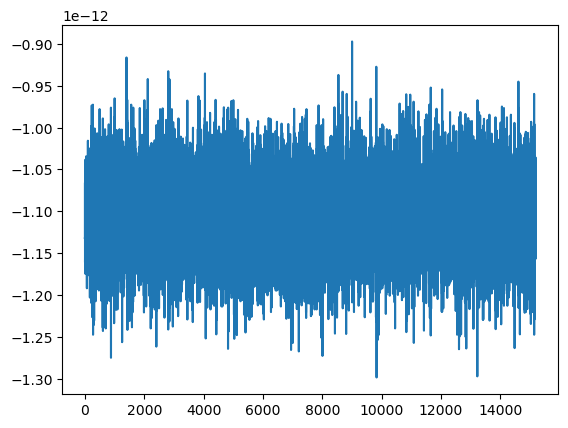

In [15]:
data_matrix_df[power_features].sum(axis=1).plot()

### Reading gamma values 

In [16]:
gamma_df = pd.read_csv(path.join(folder_location, "{}_gamma.csv".format(folder_name)), names=K_features)

In [17]:
gamma_df

,G_1,G_2,G_3,G_4,G_5,G_6,G_7,G_8,G_9,G_10,...,L_20,L_21,L_22,L_23,L_24,L_25,L_26,L_27,L_28,L_29
0,-3.14160000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
1,0.00000000,-3.14160000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
2,0.00000000,0.00000000,-3.14160000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
3,0.00000000,0.00000000,0.00000000,-3.14160000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
4,0.00000000,0.00000000,0.00000000,0.00000000,-3.14160000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
5,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-3.14160000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
6,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-3.14160000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
7,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-3.14160000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
8,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-3.14160000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
9,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-3.14160000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000


### Splitting the time-series with respect to the perturbation points

In [18]:
#Getting perturbations time points
perturbation_points_df = pd.read_csv(path.join(folder_location, "{}_timepoints.csv".format(folder_name)))

perturbation_points_df = perturbation_points_df[perturbation_points_df["Perturbation timepoints"] <= final_time]

In [19]:
perturbation_time_point_list = perturbation_points_df["Perturbation timepoints"]
# perturbation_time_point_list

In [20]:
perturbation_time_point_list

0       0
1       2
2       4
3       6
4       8
     ... 
71    142
72    144
73    146
74    148
75    150
Name: Perturbation timepoints, Length: 76, dtype: int64

In [21]:
print("Number of perturnations:{}".format(len(perturbation_time_point_list)))

Number of perturnations:76


In [22]:
#Splitting the data_matrix with the timeseries into a list of timeseries dataframes based on where the perturbation is introduced
#The purpose of this step is to smoothen each of perturbation segment independently using splines and find the derivaties
#This will avoid jumps in the derivative due to the discontinuity at the perturbanc time point

data_matrix_df_list =[data_matrix_df[(ind_i < data_matrix_df["time"]) & (data_matrix_df["time"] < ind_j) ] 
                       for ind_i, ind_j in zip(perturbation_time_point_list[:-1], perturbation_time_point_list[1:])]


data_matrix_df_appended = pd.concat(data_matrix_df_list, ignore_index=True)

data_matrix_df_appended

,time,Phi_G_1,Phi_G_2,Phi_G_3,Phi_G_4,Phi_G_5,Phi_G_6,Phi_G_7,Phi_G_8,Phi_G_9,...,P_L_20,P_L_21,P_L_22,P_L_23,P_L_24,P_L_25,P_L_26,P_L_27,P_L_28,P_L_29
0,0.01000000,-0.10269486,0.00215632,0.01326875,0.02181531,-0.00210533,0.05458524,0.10150276,-0.00600223,0.09160471,...,-6.05362283,-1.78950513,0.72158895,-1.75014630,-2.01174773,-1.25994248,-0.29974895,-1.60082364,-1.21946664,-2.15275272
1,0.02000000,-0.09545429,0.00756360,0.01893926,0.02631647,0.00208856,0.05897073,0.10529431,-0.00095893,0.09519037,...,-6.46513648,-2.19256577,0.41051424,-2.06218877,-2.46739982,-1.71408226,-0.77464965,-2.11973911,-1.58200928,-2.45290647
2,0.03000000,-0.08564310,0.01493089,0.02676667,0.03221558,0.00748273,0.06476093,0.11028691,0.00573889,0.09989000,...,-6.64110690,-2.44216297,0.21364137,-2.25946849,-2.74421317,-1.96628110,-1.05683700,-2.42941579,-1.80814162,-2.64030250
3,0.04000000,-0.07445209,0.02340240,0.03579735,0.03885866,0.01351362,0.07122609,0.11589825,0.01331926,0.10514830,...,-6.74056793,-2.59414682,0.09422814,-2.37922590,-2.91307731,-2.11443679,-1.22486568,-2.61522831,-1.94284544,-2.75174648
4,0.05000000,-0.06264417,0.03242103,0.04540097,0.04585013,0.01985153,0.07791918,0.12177769,0.02131276,0.11063587,...,-6.80022460,-2.68710767,0.02183911,-2.45191240,-3.01684549,-2.20421234,-1.32654455,-2.72836592,-2.02339011,-2.81811867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,149.95260000,0.77857011,0.86744753,0.84106638,0.94649964,0.94084035,0.92866158,1.05311793,0.82111651,0.99497461,...,-6.82456718,-2.75717109,-0.02989496,-2.48226357,-3.09121849,-2.33723772,-1.42963879,-2.83860184,-2.07532818,-2.84251924
14995,149.96260000,0.78930899,0.84711271,0.82769111,0.93861221,0.94950237,0.93953627,1.04435217,0.84549183,0.99293128,...,-6.82215350,-2.75759001,-0.03012352,-2.48135330,-3.09156670,-2.33930637,-1.43050778,-2.83951320,-2.07512418,-2.84196500
14996,149.97260000,0.80035225,0.82782816,0.81571476,0.93083630,0.95752194,0.95055953,1.03504605,0.87030443,0.99076992,...,-6.81949058,-2.75770457,-0.02982359,-2.48037222,-3.09183049,-2.34008993,-1.43091429,-2.84007102,-2.07488862,-2.84151812
14997,149.98260000,0.81156510,0.80979582,0.80523330,0.92332254,0.96477540,0.96152772,1.02538349,0.89522599,0.98854375,...,-6.81661844,-2.75751587,-0.02900373,-2.47933492,-3.09200743,-2.33959788,-1.43086127,-2.84027417,-2.07462742,-2.84118540


#### Loading admittance matrix, Y

In [23]:
admittance_Y_df = pd.read_csv(path.join(folder_location, "{}_Y.csv".format(folder_name)), names=K_features)
admittance_Y_df.set_index(pd.Index(K_features), inplace=True)
for column in admittance_Y_df.columns:
    admittance_Y_df[column] = admittance_Y_df[column].apply(lambda x: x.replace('i', 'j'))

In [24]:
admittance_Y_df

,G_1,G_2,G_3,G_4,G_5,G_6,G_7,G_8,G_9,G_10,...,L_20,L_21,L_22,L_23,L_24,L_25,L_26,L_27,L_28,L_29
G_1,0-14.118j,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G_2,0,0-47.356j,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G_3,0,0,0-48.892j,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G_4,0,0,0,0-47.139j,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G_5,0,0,0,0,0-35.487j,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G_6,0,0,0,0,0,0-48.892j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G_7,0,0,0,0,0,0,0-40.281j,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G_8,0,0,0,0,0,0,0,0-38.421j,0,0,...,0,0,0,0,0,0,0,0,0,0
G_9,0,0,0,0,0,0,0,0,0-67.182j,0,...,0,0,0,0,0,0,0,0,0,0
G_10,0,0,0,0,0,0,0,0,0,0-85.596j,...,0,0,0,0,0,0,0,0,0,0


#### Loading static parameters

In [25]:
static_param_df = pd.read_csv(path.join(folder_location, "{}_staticparams.csv".format(folder_name)))

In [26]:
static_param_df

,V,A,omega_R,D,H
0,1.04990000,2.50000000,376.99111843,50,10.00000000
1,0.98200000,6.34230000,376.99111843,50,25.36920000
2,0.98410000,6.50000000,376.99111843,50,26.00000000
3,0.99720000,6.32000000,376.99111843,50,25.28000000
4,1.01230000,5.08000000,376.99111843,50,20.32000000
5,1.04940000,6.50000000,376.99111843,50,26.00000000
6,1.06360000,5.60000000,376.99111843,50,22.40000000
7,1.02750000,5.40000000,376.99111843,50,21.60000000
8,1.02650000,8.30000000,376.99111843,50,33.20000000
9,1.03000000,10.00000000,376.99111843,50,40.00000000


#### Loading coupling matrix, K

In [27]:
coupling_K_df = pd.read_csv(path.join(folder_location, "{}_K.csv".format(folder_name)), names=K_features)
coupling_K_df.set_index(pd.Index(K_features), inplace=True)

In [28]:
coupling_K_df

,G_1,G_2,G_3,G_4,G_5,G_6,G_7,G_8,G_9,G_10,...,L_20,L_21,L_22,L_23,L_24,L_25,L_26,L_27,L_28,L_29
G_1,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
G_2,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
G_3,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
G_4,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
G_5,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
G_6,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
G_7,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
G_8,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
G_9,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
G_10,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000


In [29]:
coupling_matrix_true = coupling_K_df .to_numpy()
coupling_matrix_true

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   , 73.629],
       [ 0.   ,  0.   ,  0.   , ...,  0.   , 73.629,  0.   ]])

In [30]:
gamma_matrix = gamma_df.to_numpy()
admittance_Y_matrix = admittance_Y_df.to_numpy()

gamma_matrix

array([[-3.1416,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    , -3.1416,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    , -3.1416, ...,  0.    ,  0.    ,  0.    ],
       ...,
       [ 0.    ,  0.    ,  0.    , ..., -3.1416,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    , ...,  0.    , -3.1416,  0.    ],
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    , -3.1416]])

In [31]:
coupling_matrix_init = np.ones(admittance_Y_matrix.shape)
# coupling_matrix_init = np.zeros(admittance_Y_matrix.shape)
# coupling_matrix_init[3,:] = 1

coupling_matrix_init = np.triu(coupling_matrix_init, 0)
coupling_matrix_init
sparse_coupling_matrix_init = coo_array(coupling_matrix_init)
sparse_coupling_matrix_init.toarray()

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

## Smoothening data and finding derivatives using splines

In [32]:
from dae_finder import add_noise_to_df

noise_perc = 0.01
# data_matrix_df_list = [data_matrix_df]
num_time_points = len(data_matrix_df_list[0])
data_matrix_features = data_matrix_df_list[0].columns
for ind, data_matrix_ in enumerate(data_matrix_df_list):
    t_exact = data_matrix_["time"]
    # noisy_data_df = add_noise_to_df(data_matrix_, noise_perc=noise_perc, random_seed=111)
    noise_arr = np.random.normal(size=data_matrix_.shape)
    noisy_data_df = data_matrix_ + (noise_perc/100)*(abs(data_matrix_))*noise_arr
    
    noisy_data_df["time"] = t_exact
    data_matrix_df_list[ind] = noisy_data_df

In [33]:
# from copy import deepcopy
# from scipy import interpolate
# from dae_finder import der_label 
# import itertools
# def smooth_data(data_matrix,
#                 domain_var="t",
#                 smooth_method ="spline",
#                 s_param_=None,
#                 noise_perc=0,
#                 derr_order=1,
#                 eval_points=[],
#                 num_time_points=0):
#     """
#     :param data_matrix: Data matrix to smoothen. nxp data frame structure is assumed where n is the number of
#                         data points and p is the number of features (predictors).
#     :param domain_var: Domain variable with respect to which the data needs to be smoothened. Default is assumed to be
#                         "t" (time).
#     :param smooth_method: Numerical method used for smoothening.
#     :param s_param: smoothening parameter.
#     :param noise_perc: optional estimate of noise to signal ratio %
#     :param derr_order: Number of derivatives need to be calculated, wrt the domain variable, after smoothening the data.
#     :param eval_points: option list of points at which the smoothened data and derivatives will be evaluated for output
#     :return: pd.DataFrame of size len(eval_points) x k where k is the number of features and their derivatives.
#     """
#     assert domain_var in data_matrix, "domain variable not found in the data matrix"
#     s_param = deepcopy(s_param_)
#     data_t = data_matrix[domain_var]
#     if num_time_points == 0:
#         num_time_points = len(data_matrix)
#     if len(eval_points) == 0:
#         eval_points = np.linspace(data_t.iloc[0], data_t.iloc[-1], num_time_points)
#     t_eval_new = eval_points

#     data_matrix_ = data_matrix.drop(domain_var, axis=1)
#     data_matrix_std = data_matrix_.std()

#     data_matrix_smooth = pd.DataFrame(t_eval_new, columns=[domain_var])

#     if smooth_method == "spline":
#         if s_param:
#             s_param_list = [s_param for feature in data_matrix_]
#         else:
#             s_param_list = [num_time_points * (0.01 * noise_perc * data_matrix_std[feature]) ** 2 for
#                             feature in data_matrix_]
#         smoothened_values_list = [np.hstack([interpolate.splev(t_eval_new, interpolate.splrep(data_t,
#                                                                                               data_matrix_[feature],
#                                                                                               s=s_param_val), der=der_ind) [:, None]
#                                              for der_ind in range(derr_order + 1)])
#                                   for feature, s_param_val in zip(data_matrix_, s_param_list)]
#         smoothened_values = np.hstack(smoothened_values_list)
#         column_label_list = [[der_label(feature, der_ind) for der_ind in range(derr_order + 1)]
#                              for feature in data_matrix_]
#         column_label_list = list(itertools.chain.from_iterable(column_label_list))
#         print(len(column_label_list))
#         print(smoothened_values.shape)
#         smoothened_df = pd.DataFrame(smoothened_values, columns=column_label_list)
#         data_matrix_smooth = pd.concat([data_matrix_smooth, smoothened_df], axis=1)

#         # for feature in data_matrix_:
#         #     if not s_param:
#         #         # smoothing parameter: when equal weightage: num_data_points * std of data
#         #         s_param = num_time_points * (0.01 * noise_perc * data_matrix_std[feature]) ** 2
#         #     tck = interpolate.splrep(data_t, data_matrix_[feature], s=s_param)
#         #     for der_ind in range(derr_order + 1):
#         #         smoothed_data = interpolate.splev(t_eval_new, tck, der=der_ind)
#         #         data_matrix_smooth[der_label(feature, der_ind)] = smoothed_data
#     else:
#         raise "Smoothening type not supported"

#     return data_matrix_smooth

In [34]:
from dae_finder import smooth_data

data_amplify_factor = 1
# s_param = 0.000001
s_param = 0.001
# Calling the smoothening function
data_matrix_smooth_df_list = [smooth_data(data_matrix, domain_var="time", derr_order=1, noise_perc=noise_perc, s_param_=s_param,
                                         num_time_points=data_amplify_factor*len(data_matrix),
                                         silent = False) for
                              data_matrix in data_matrix_df_list]

if len(data_matrix_df_list) > 1:
    data_matrix_df_smooth_appended = pd.concat(data_matrix_smooth_df_list, ignore_index=True)
else:
    data_matrix_df_smooth_appended = data_matrix_smooth_df_list[0]

data_matrix_df_smooth = data_matrix_df_smooth_appended[data_matrix_features]
# if "time" in data_matrix_df_smooth:
#     data_matrix_df_smooth = data_matrix_df_smooth.drop("time", axis=1)

Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data


/opt/anaconda3/envs/pysindy_faster/lib/python3.12/site-packages/scipy/interpolate/_fitpack_py.py:295: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  res = _impl.splrep(x, y, w, xb, xe, k, task, s, t, full_output, per, quiet)


Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data


/opt/anaconda3/envs/pysindy_faster/lib/python3.12/site-packages/scipy/interpolate/_fitpack_py.py:295: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  res = _impl.splrep(x, y, w, xb, xe, k, task, s, t, full_output, per, quiet)
/opt/anaconda3/envs/pysindy_faster/lib/python3.12/site-packages/scipy/interpolate/_fitpack_py.py:295: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  res = _impl.splrep(x, y, w, xb, xe, k, task, s, t, full_output, per, quiet)


Returning the smoothened data
Returning the smoothened data
Returning the smoothened data


/opt/anaconda3/envs/pysindy_faster/lib/python3.12/site-packages/scipy/interpolate/_fitpack_py.py:295: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  res = _impl.splrep(x, y, w, xb, xe, k, task, s, t, full_output, per, quiet)


Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data
Returning the smoothened data


/opt/anaconda3/envs/pysindy_faster/lib/python3.12/site-packages/scipy/interpolate/_fitpack_py.py:295: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  res = _impl.splrep(x, y, w, xb, xe, k, task, s, t, full_output, per, quiet)


Returning the smoothened data
Returning the smoothened data
Returning the smoothened data


data_matrix_df_smooth_appended

In [35]:
(data_matrix_df_smooth - data_matrix_df_appended).sum()

time      -0.00000000
Phi_G_1    0.00272621
Phi_G_2   -0.00423862
Phi_G_3    0.00138291
Phi_G_4    0.00054493
              ...    
P_L_25    -0.01286665
P_L_26    -0.04070910
P_L_27     0.02774006
P_L_28    -0.01568504
P_L_29    -0.00808111
Length: 148, dtype: float64

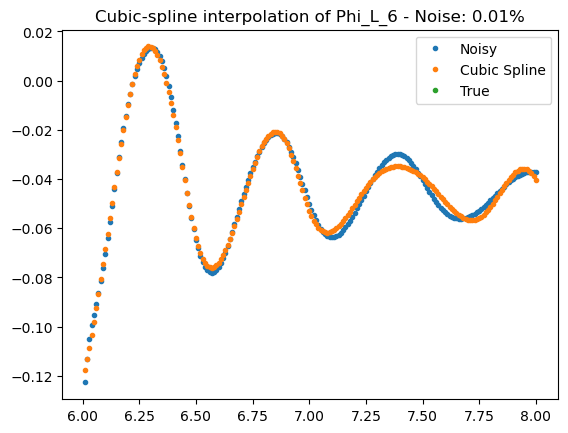

In [36]:
ind = 3
feature_ = "Phi_L_6"

plt.figure()
# plt.plot(data_matrix_df_list[1]["t"], data_matrix_df_list[1]["x"], "x", t_eval_new, x_new,
#         data_matrix_df[50:100]["t"], data_matrix_df[50:100]["x"], "o")

plt.plot(data_matrix_df_list[ind]["time"], data_matrix_df_list[ind][feature_], ".",
         data_matrix_smooth_df_list[ind]["time"],
         data_matrix_smooth_df_list[ind][feature_], ".",
         data_matrix_df_list[ind][ind * num_time_points:(ind + 1) * num_time_points]["time"],
         data_matrix_df_list[ind][ind * num_time_points:(ind + 1) * num_time_points][feature_], ".")
plt.legend(['Noisy', 'Cubic Spline', 'True'])
# plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Cubic-spline interpolation of {} - Noise: {}%'.format(feature_, noise_perc))
plt.show()

## Forming candidate library for powersystems

### Defining the sin interaction terms 

In [37]:
from dae_finder import FeatureCouplingTransformer

def coup_fun_sin_diff(x,y,i,j,gam_matrix):
    return np.sin(x-y- gam_matrix[i,j])

def coup_namer_sin_diff(x,y,i,j,gam_matrix=None):
    return "sin( {}-{} -gamma_{},{} )".format(x,y,i,j)


# def coup_fun_diff(x,y,i,j,gam_matrix):
#     return x-y- gam_matrix[i,j]

# def coup_namer_diff(x,y,i,j,gam_matrix):
#     return "{}-{} -gamma_{},{}".format(x,y,i,j)

transfomrer_sin_diff = FeatureCouplingTransformer(sparse_coupling_matrix_init,
                                           coupling_func= coup_fun_sin_diff,
                                           coupling_namer= coup_namer_sin_diff,
                                           coupling_func_args={"gam_matrix":gamma_matrix},
                                              return_df=True)

# transformer_diff = FeatureCouplingTransformer(sparse_coupling_matrix_init,
#                                            coupling_func= coup_fun_diff,
#                                            coupling_namer= coup_namer_diff,
#                                            coupling_func_args={"gam_matrix":gamma_matrix},
#                                               return_df=True)

In [38]:
data_matrix_df_comb = pd.concat(data_matrix_df_list, ignore_index=True)
data_matrix_df_smooth = data_matrix_df_comb
data_matrix_features = data_matrix_df_list[0].columns

In [39]:
#Creating library with sin(load angle difference)
sin_diff_library = transfomrer_sin_diff.fit_transform(data_matrix_df_smooth.drop(["time"], axis=1))
# sin_diff_library = transfomrer_sin_diff.fit_transform(data_matrix_df.drop(["time"], axis=1))

cop_ind = transfomrer_sin_diff.coupled_indices_list

# #Creating library with load angle difference
# diff_library = transformer_diff.fit_transform(data_matrix_df.drop(["time"], axis=1))


In [40]:
# candidate_lib = pd.concat([data_matrix_df.drop("time", axis=1), sin_diff_library], axis=1)

candidate_lib = pd.concat([data_matrix_df_smooth.drop("time", axis=1), sin_diff_library], axis=1)

In [41]:
candidate_lib

,Phi_G_1,Phi_G_2,Phi_G_3,Phi_G_4,Phi_G_5,Phi_G_6,Phi_G_7,Phi_G_8,Phi_G_9,Phi_G_10,...,"sin( Phi_L_26-Phi_L_26 -gamma_45,45 )","sin( Phi_L_26-Phi_L_27 -gamma_45,46 )","sin( Phi_L_26-Phi_L_28 -gamma_45,47 )","sin( Phi_L_26-Phi_L_29 -gamma_45,48 )","sin( Phi_L_27-Phi_L_27 -gamma_46,46 )","sin( Phi_L_27-Phi_L_28 -gamma_46,47 )","sin( Phi_L_27-Phi_L_29 -gamma_46,48 )","sin( Phi_L_28-Phi_L_28 -gamma_47,47 )","sin( Phi_L_28-Phi_L_29 -gamma_47,48 )","sin( Phi_L_29-Phi_L_29 -gamma_48,48 )"
0,-0.10269186,0.00215626,0.01326799,0.02181490,-0.00210510,0.05458027,0.10150922,-0.00600187,0.09160884,-0.23162211,...,-0.00000735,0.01620232,-0.03026200,-0.05648220,-0.00000735,-0.04645293,-0.07265125,-0.00000735,-0.02624264,-0.00000735
1,-0.09546774,0.00756315,0.01894173,0.02631879,0.00208889,0.05897588,0.10531050,-0.00095887,0.09518627,-0.22674280,...,-0.00000735,0.02336441,-0.04425389,-0.07985603,-0.00000735,-0.06758333,-0.10312402,-0.00000735,-0.03566523,-0.00000735
2,-0.08564066,0.01493069,0.02677050,0.03221828,0.00748136,0.06476403,0.11028685,0.00573924,0.09989549,-0.22070044,...,-0.00000735,0.02787546,-0.05233729,-0.09351101,-0.00000735,-0.08015421,-0.12122799,-0.00000735,-0.04127489,-0.00000735
3,-0.07445216,0.02340594,0.03579619,0.03886413,0.01351468,0.07121823,0.11590365,0.01332139,0.10513352,-0.21412140,...,-0.00000735,0.03072398,-0.05706454,-0.10161680,-0.00000735,-0.08771152,-0.13213377,-0.00000735,-0.04468206,-0.00000735
4,-0.06265363,0.03241725,0.04539648,0.04585026,0.01985053,0.07792129,0.12179698,0.02131636,0.11063327,-0.20733303,...,-0.00000735,0.03248770,-0.05981738,-0.10631930,-0.00000735,-0.09221533,-0.13856675,-0.00000735,-0.04665059,-0.00000735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.77859182,0.86731479,0.84100925,0.94638093,0.94086128,0.92852506,1.05319331,0.82113114,0.99505461,0.75309301,...,-0.00000735,0.03170750,-0.06831622,-0.11825580,-0.00000735,-0.09991529,-0.14968136,-0.00000735,-0.05014267,-0.00000735
14995,0.78934024,0.84713305,0.82773916,0.93843607,0.94935936,0.93955443,1.04437609,0.84562131,0.99296824,0.76065629,...,-0.00000735,0.03260075,-0.06635607,-0.11572962,-0.00000735,-0.09884970,-0.14804980,-0.00000735,-0.04956435,-0.00000735
14996,0.80039505,0.82780360,0.81569762,0.93096005,0.95754037,0.95063318,1.03487173,0.87037961,0.99084781,0.76690988,...,-0.00000735,0.03344257,-0.06454187,-0.11320003,-0.00000735,-0.09787861,-0.14636431,-0.00000735,-0.04883699,-0.00000735
14997,0.81151732,0.80983554,0.80519536,0.92327917,0.96467567,0.96159527,1.02537711,0.89508096,0.98846596,0.77167224,...,-0.00000735,0.03432165,-0.06259608,-0.11055734,-0.00000735,-0.09681354,-0.14460345,-0.00000735,-0.04812818,-0.00000735


### Removing zero features

In [42]:
non_zero_column_series = (candidate_lib**2).sum() > 0.01
non_zero_column_series
non_columns = [column for column in candidate_lib if non_zero_column_series[column]]

candidate_lib = candidate_lib[non_columns]

## Finding Algebraic relationship

### Using sympy to find factors of redundant feature and refine the library

In [43]:
import sympy

from dae_finder import get_refined_lib, remove_paranth_from_feat

# Adding the state variables as scipy symbols
feat_list = list(data_matrix_df_appended.columns)
feat_list_str = ", ".join(remove_paranth_from_feat(data_matrix_df_appended.columns))
exec(feat_list_str+ "= sympy.symbols("+str(feat_list)+")")

In [44]:
data_matrix_df_smooth_appended.columns

Index(['time', 'Phi_G_1', 'd(Phi_G_1) /dt', 'Phi_G_2', 'd(Phi_G_2) /dt',
       'Phi_G_3', 'd(Phi_G_3) /dt', 'Phi_G_4', 'd(Phi_G_4) /dt', 'Phi_G_5',
       ...
       'P_L_25', 'd(P_L_25) /dt', 'P_L_26', 'd(P_L_26) /dt', 'P_L_27',
       'd(P_L_27) /dt', 'P_L_28', 'd(P_L_28) /dt', 'P_L_29', 'd(P_L_29) /dt'],
      dtype='object', length=295)

In [45]:
data_matrix_features

Index(['time', 'Phi_G_1', 'Phi_G_2', 'Phi_G_3', 'Phi_G_4', 'Phi_G_5',
       'Phi_G_6', 'Phi_G_7', 'Phi_G_8', 'Phi_G_9',
       ...
       'P_L_20', 'P_L_21', 'P_L_22', 'P_L_23', 'P_L_24', 'P_L_25', 'P_L_26',
       'P_L_27', 'P_L_28', 'P_L_29'],
      dtype='object', length=148)

In [46]:
feature_list = list(data_matrix_features)
feature_list.remove('time')

feature_list

['Phi_G_1',
 'Phi_G_2',
 'Phi_G_3',
 'Phi_G_4',
 'Phi_G_5',
 'Phi_G_6',
 'Phi_G_7',
 'Phi_G_8',
 'Phi_G_9',
 'Phi_G_10',
 'Phi_T_1',
 'Phi_T_2',
 'Phi_T_3',
 'Phi_T_4',
 'Phi_T_5',
 'Phi_T_6',
 'Phi_T_7',
 'Phi_T_8',
 'Phi_T_9',
 'Phi_T_10',
 'Phi_L_1',
 'Phi_L_2',
 'Phi_L_3',
 'Phi_L_4',
 'Phi_L_5',
 'Phi_L_6',
 'Phi_L_7',
 'Phi_L_8',
 'Phi_L_9',
 'Phi_L_10',
 'Phi_L_11',
 'Phi_L_12',
 'Phi_L_13',
 'Phi_L_14',
 'Phi_L_15',
 'Phi_L_16',
 'Phi_L_17',
 'Phi_L_18',
 'Phi_L_19',
 'Phi_L_20',
 'Phi_L_21',
 'Phi_L_22',
 'Phi_L_23',
 'Phi_L_24',
 'Phi_L_25',
 'Phi_L_26',
 'Phi_L_27',
 'Phi_L_28',
 'Phi_L_29',
 'om_G_1',
 'om_G_2',
 'om_G_3',
 'om_G_4',
 'om_G_5',
 'om_G_6',
 'om_G_7',
 'om_G_8',
 'om_G_9',
 'om_G_10',
 'om_T_1',
 'om_T_2',
 'om_T_3',
 'om_T_4',
 'om_T_5',
 'om_T_6',
 'om_T_7',
 'om_T_8',
 'om_T_9',
 'om_T_10',
 'om_L_1',
 'om_L_2',
 'om_L_3',
 'om_L_4',
 'om_L_5',
 'om_L_6',
 'om_L_7',
 'om_L_8',
 'om_L_9',
 'om_L_10',
 'om_L_11',
 'om_L_12',
 'om_L_13',
 'om_L_14',
 'om_L_15

In [47]:
refined_candid_lib = data_matrix_df_smooth_appended[feature_list]

In [48]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler(with_std=True, with_mean=False)
scaled_refined_lib = pd.DataFrame(s_scaler.fit_transform(refined_candid_lib), columns=s_scaler.feature_names_in_)
scaled_cand_lib = pd.DataFrame(s_scaler.fit_transform(candidate_lib), columns=s_scaler.feature_names_in_)

In [49]:
candidate_lib

,Phi_G_1,Phi_G_2,Phi_G_3,Phi_G_4,Phi_G_5,Phi_G_6,Phi_G_7,Phi_G_8,Phi_G_9,Phi_G_10,...,"sin( Phi_L_25-Phi_L_26 -gamma_44,45 )","sin( Phi_L_25-Phi_L_27 -gamma_44,46 )","sin( Phi_L_25-Phi_L_28 -gamma_44,47 )","sin( Phi_L_25-Phi_L_29 -gamma_44,48 )","sin( Phi_L_26-Phi_L_27 -gamma_45,46 )","sin( Phi_L_26-Phi_L_28 -gamma_45,47 )","sin( Phi_L_26-Phi_L_29 -gamma_45,48 )","sin( Phi_L_27-Phi_L_28 -gamma_46,47 )","sin( Phi_L_27-Phi_L_29 -gamma_46,48 )","sin( Phi_L_28-Phi_L_29 -gamma_47,48 )"
0,-0.10269186,0.00215626,0.01326799,0.02181490,-0.00210510,0.05458027,0.10150922,-0.00600187,0.09160884,-0.23162211,...,-0.00573873,0.01046408,-0.03599760,-0.06221084,0.01620232,-0.03026200,-0.05648220,-0.04645293,-0.07265125,-0.02624264
1,-0.09546774,0.00756315,0.01894173,0.02631879,0.00208889,0.05897588,0.10531050,-0.00095887,0.09518627,-0.22674280,...,0.00200421,0.02536802,-0.04225156,-0.07785806,0.02336441,-0.04425389,-0.07985603,-0.06758333,-0.10312402,-0.03566523
2,-0.08564066,0.01493069,0.02677050,0.03221828,0.00748136,0.06476403,0.11028685,0.00573924,0.09989549,-0.22070044,...,0.00748227,0.03535404,-0.04486381,-0.08605891,0.02787546,-0.05233729,-0.09351101,-0.08015421,-0.12122799,-0.04127489
3,-0.07445216,0.02340594,0.03579619,0.03886413,0.01351468,0.07121823,0.11590365,0.01332139,0.10513352,-0.21412140,...,0.01121250,0.04192926,-0.04586672,-0.09045595,0.03072398,-0.05706454,-0.10161680,-0.08771152,-0.13213377,-0.04468206
4,-0.06265363,0.03241725,0.04539648,0.04585026,0.01985053,0.07792129,0.12179698,0.02131636,0.11063327,-0.20733303,...,0.01371773,0.04619513,-0.04611859,-0.09266933,0.03248770,-0.05981738,-0.10631930,-0.09221533,-0.13856675,-0.04665059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.77859182,0.86731479,0.84100925,0.94638093,0.94086128,0.92852506,1.05319331,0.82113114,0.99505461,0.75309301,...,0.00308054,0.03478634,-0.06524256,-0.11519632,0.03170750,-0.06831622,-0.11825580,-0.09991529,-0.14968136,-0.05014267
14995,0.78934024,0.84713305,0.82773916,0.93843607,0.94935936,0.93955443,1.04437609,0.84562131,0.99296824,0.76065629,...,0.00744759,0.04004347,-0.05892306,-0.10832887,0.03260075,-0.06635607,-0.11572962,-0.09884970,-0.14804980,-0.04956435
14996,0.80039505,0.82780360,0.81569762,0.93096005,0.95754037,0.95063318,1.03487173,0.87037961,0.99084781,0.76690988,...,0.01184767,0.04528127,-0.05271437,-0.10142056,0.03344257,-0.06454187,-0.11320003,-0.09787861,-0.14636431,-0.04883699
14997,0.81151732,0.80983554,0.80519536,0.92327917,0.96467567,0.96159527,1.02537711,0.89508096,0.98846596,0.77167224,...,0.01639119,0.05069857,-0.04622862,-0.09425178,0.03432165,-0.06259608,-0.11055734,-0.09681354,-0.14460345,-0.04812818


# Using Sequential Thresholding

## Finding the conservation laws

In [50]:
from dae_finder import sequentialThLin, AlgModelFinder
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression
lin_reg_model_arg = {"fit_intercept": True}
seq_th_model = sequentialThLin(custom_model=True,
                               custom_model_ob = lin_reg_model,
                               custom_model_arg= lin_reg_model_arg,
                              coef_threshold=0.1)
# seq_th_model = sequentialThLin(coef_threshold=0.1, alpha=0.3, fit_intercept=True)

algebraic_model_th = AlgModelFinder(custom_model=True, custom_model_ob=seq_th_model)

In [51]:
feature_to_libr_map = {power_feat: candidate_lib.columns.drop(phase_features+power_features+freq_features) for power_feat in power_features}
feature_to_libr_map_constr = {power_feat: [lib_feat for lib_feat in lib_features if power_feat[2:]+" " in lib_feat or power_feat[2:]+"-" in lib_feat] for power_feat, lib_features in feature_to_libr_map.items()}

# feature_to_libr_map = {power_feat: candidate_lib.columns.drop(power_features+freq_features) for power_feat in power_features}
# algebraic_model_th.fit(candidate_lib, scale_columns=True,
#                        features_to_fit=power_features,
#                        feature_to_library_map_=feature_to_libr_map_constr)


algebraic_model_th.fit(candidate_lib, scale_columns=True,
                       features_to_fit=power_features,
                       feature_to_library_map_=feature_to_libr_map_constr)

Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 4 iterations
Sequential threshold converged in 7 iterations
Sequential threshold converged in 4 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 5 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 4 iterations
Sequential threshold converged in 4 iterations
Sequential threshold converged in 6 iterations
Sequential threshold converged in 3 iterations
Sequential th

AlgModelFinder(custom_model=True,
               custom_model_ob=<dae_finder.sequentialThLin object at 0x1444b81a0>)

In [52]:
freq_features

['om_G_1',
 'om_G_2',
 'om_G_3',
 'om_G_4',
 'om_G_5',
 'om_G_6',
 'om_G_7',
 'om_G_8',
 'om_G_9',
 'om_G_10',
 'om_T_1',
 'om_T_2',
 'om_T_3',
 'om_T_4',
 'om_T_5',
 'om_T_6',
 'om_T_7',
 'om_T_8',
 'om_T_9',
 'om_T_10',
 'om_L_1',
 'om_L_2',
 'om_L_3',
 'om_L_4',
 'om_L_5',
 'om_L_6',
 'om_L_7',
 'om_L_8',
 'om_L_9',
 'om_L_10',
 'om_L_11',
 'om_L_12',
 'om_L_13',
 'om_L_14',
 'om_L_15',
 'om_L_16',
 'om_L_17',
 'om_L_18',
 'om_L_19',
 'om_L_20',
 'om_L_21',
 'om_L_22',
 'om_L_23',
 'om_L_24',
 'om_L_25',
 'om_L_26',
 'om_L_27',
 'om_L_28',
 'om_L_29']

In [53]:
#Best 10 models using R2 metrix
algebraic_model_th.best_models()

,P_G_1,P_G_5,P_G_4,P_G_8,P_G_3,P_G_2,P_G_6,P_G_10,P_G_7,P_G_9,...,P_L_25,P_L_24,P_L_16,P_L_3,P_L_4,P_L_10,P_L_19,P_L_2,P_L_22,P_L_6
"sin( Phi_G_1-Phi_G_2 -gamma_0,1 )",0.00000000,NaN,NaN,NaN,NaN,0.00000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"sin( Phi_G_1-Phi_G_3 -gamma_0,2 )",0.00000000,NaN,NaN,NaN,0.00000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"sin( Phi_G_1-Phi_G_4 -gamma_0,3 )",0.00000000,NaN,0.00000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"sin( Phi_G_1-Phi_G_5 -gamma_0,4 )",0.00000000,0.00000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"sin( Phi_G_1-Phi_G_6 -gamma_0,5 )",0.00000000,NaN,NaN,NaN,NaN,NaN,0.00000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"sin( Phi_L_19-Phi_L_22 -gamma_38,41 )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00000000,NaN,1.23519454,NaN
"sin( Phi_L_2-Phi_L_6 -gamma_21,25 )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.39387544,NaN,3.56169342
"sin( Phi_L_2-Phi_L_22 -gamma_21,41 )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000000,0.51720077,NaN
"sin( Phi_L_6-Phi_L_22 -gamma_25,41 )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000000,1.87427403


In [54]:
algebraic_model_th.get_fitted_intercepts()

{'P_G_1': 1.5053468938820465e-06,
 'P_G_2': 3.4687551799662165e-05,
 'P_G_3': -2.6354249388412308e-05,
 'P_G_4': 5.608038924039492e-05,
 'P_G_5': -1.6892900632259235e-05,
 'P_G_6': -1.3235147797743829e-05,
 'P_G_7': 5.435812178460754e-07,
 'P_G_8': -7.783565069664841e-05,
 'P_G_9': 3.220753372311094e-05,
 'P_G_10': -3.342110278252155e-05,
 'P_T_1': -5.087491975871575e-05,
 'P_T_2': -4.4268966691298655e-05,
 'P_T_3': 5.359986972988716e-05,
 'P_T_4': -3.2648140202827073e-05,
 'P_T_5': 3.3171847973968574e-06,
 'P_T_6': -0.010939479464728159,
 'P_T_7': 2.694843662087978e-05,
 'P_T_8': 0.00011242799112279678,
 'P_T_9': 0.013173210931161219,
 'P_T_10': -0.008691528960252111,
 'P_L_1': -1.6913075028773927e-05,
 'P_L_2': 0.8358563498421071,
 'P_L_3': -0.12266043982166497,
 'P_L_4': -1.3588766437220865,
 'P_L_5': 1.029282930042449,
 'P_L_6': -0.15077505072423428,
 'P_L_7': 1.1681413291444205,
 'P_L_8': -1.6312000906077406,
 'P_L_9': -3.5067849087722e-05,
 'P_L_10': 0.006211018210264021,
 'P_L_1

In [55]:
for feat in power_features:
    print(feat)
    print(algebraic_model_th.best_models()[feat][abs(algebraic_model_th.best_models()[feat])>0.1])

P_G_1
sin( Phi_G_1-Phi_T_1 -gamma_0,10 )   15.56215423
r2- metric                            0.99999976
Name: P_G_1, dtype: float64
P_G_2
sin( Phi_G_2-Phi_T_2 -gamma_1,11 )   45.66622020
r2- metric                            0.99999922
Name: P_G_2, dtype: float64
P_G_3
sin( Phi_G_3-Phi_T_3 -gamma_2,12 )   47.35011723
r2- metric                            0.99999928
Name: P_G_3, dtype: float64
P_G_4
sin( Phi_G_4-Phi_T_4 -gamma_3,13 )   46.87546945
r2- metric                            0.99999945
Name: P_G_4, dtype: float64
P_G_5
sin( Phi_G_5-Phi_T_5 -gamma_4,14 )   36.36580940
r2- metric                            0.99999952
Name: P_G_5, dtype: float64
P_G_6
sin( Phi_G_6-Phi_T_6 -gamma_5,15 )   53.84232960
r2- metric                            0.99999914
Name: P_G_6, dtype: float64
P_G_7
sin( Phi_G_7-Phi_T_7 -gamma_6,16 )   45.56727973
r2- metric                            0.99999899
Name: P_G_7, dtype: float64
P_G_8
sin( Phi_G_8-Phi_T_8 -gamma_7,17 )   40.56327922
r2- metric           

### Checking model accuracy

### Extracting true models from the true coupling matrix

In [56]:
fitted_models = algebraic_model_th.best_models()[:-1]

In [57]:
true_models = pd.DataFrame(columns=fitted_models.columns, index=fitted_models.index)
true_models.fillna(0, inplace=True)
for ind_i, power_feat in enumerate(power_features):
    for ind_j in range(len(power_features)):
        if abs(coupling_matrix_true[ind_i, ind_j]) > 0.5:
            # true_models.loc[feat_name, power_feat] = coupling_matrix_true[ind_i, ind_j]
            low_ind = min(ind_i, ind_j)
            up_ind = max(ind_i, ind_j)
            feat_name = coup_namer_sin_diff(phase_features[low_ind], phase_features[up_ind],
                                        low_ind, up_ind)
            # print(feat_name)
            true_models.loc[feat_name, power_feat] = 20.0
            
            # print(ind_i, ind_j, coupling_matrix_true[ind_i, ind_j])
        # true_models[power_feat][feat_name] = "haha"
        # print(ind_i, ind_j, feat_name)
        # print(true_models[power_feat])

/var/folders/vm/q63p6h6d0j70_r0d8tpfx9gc0000gn/T/ipykernel_43107/62148402.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  true_models.fillna(0, inplace=True)


In [58]:
# def compare_models(models_df_1, models_df_2, tol=1.e-5):
#     assert models_df_1.shape == models_df_2.shape, "both model dataframes should be of the same shape"
#     assert all(models_df_1.columns == models_df_2.columns) and all(models_df_1.index == models_df_2.index)

#     models_df_1[abs(models_df_1) > tol] = 1
#     models_df_1[abs(models_df_1) <= tol] = 0

#     models_df_2[abs(models_df_2) > tol] = 1
#     models_df_2[abs(models_df_2) <= tol] = 0

#     model_diff_df = models_df_1 - models_df_2

#     model_diff_df.loc["# incosistent terms"] = abs(model_diff_df).sum()

#     return model_diff_df

In [59]:
true_models.shape

(1176, 49)

In [60]:
fitted_models.shape

(1176, 49)

In [61]:
set(true_models.index).difference(set(fitted_models.index))

set()

In [62]:
from dae_finder import compare_models_

compare_models_(true_models, fitted_models)

# compare_model_output = compare_models_(true_models.drop(set(true_models.index).difference(set(fitted_models.index))), fitted_models)
# compare_model_output


,P_G_1,P_G_5,P_G_4,P_G_8,P_G_3,P_G_2,P_G_6,P_G_10,P_G_7,P_G_9,...,P_L_25,P_L_24,P_L_16,P_L_3,P_L_4,P_L_10,P_L_19,P_L_2,P_L_22,P_L_6
"sin( Phi_G_1-Phi_G_2 -gamma_0,1 )",0.00000000,NaN,NaN,NaN,NaN,0.00000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"sin( Phi_G_1-Phi_G_3 -gamma_0,2 )",0.00000000,NaN,NaN,NaN,0.00000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"sin( Phi_G_1-Phi_G_4 -gamma_0,3 )",0.00000000,NaN,0.00000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"sin( Phi_G_1-Phi_G_5 -gamma_0,4 )",0.00000000,0.00000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"sin( Phi_G_1-Phi_G_6 -gamma_0,5 )",0.00000000,NaN,NaN,NaN,NaN,NaN,0.00000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"sin( Phi_L_19-Phi_L_22 -gamma_38,41 )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00000000,NaN,-1.00000000,NaN
"sin( Phi_L_2-Phi_L_6 -gamma_21,25 )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.00000000,NaN,-1.00000000
"sin( Phi_L_2-Phi_L_22 -gamma_21,41 )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000000,-1.00000000,NaN
"sin( Phi_L_6-Phi_L_22 -gamma_25,41 )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000000,-1.00000000


In [63]:
compare_model_output = compare_models_(true_models, fitted_models)

In [64]:
compare_model_output.loc["# incosistent terms"]

P_G_1     0.00000000
P_G_5     0.00000000
P_G_4     0.00000000
P_G_8     0.00000000
P_G_3     0.00000000
P_G_2     0.00000000
P_G_6     0.00000000
P_G_10    0.00000000
P_G_7     0.00000000
P_G_9     0.00000000
P_L_12    0.00000000
P_L_1     0.00000000
P_L_9     0.00000000
P_T_1     0.00000000
P_T_5     0.00000000
P_T_2     0.00000000
P_L_28    0.00000000
P_T_8     0.00000000
P_T_3     0.00000000
P_T_7     0.00000000
P_L_7    14.00000000
P_T_4     0.00000000
P_L_13   16.00000000
P_L_17   27.00000000
P_L_27   15.00000000
P_L_29    0.00000000
P_L_20    0.00000000
P_L_8    24.00000000
P_L_18   24.00000000
P_T_6     3.00000000
P_L_26   15.00000000
P_L_11   31.00000000
P_L_15   26.00000000
P_L_5    22.00000000
P_T_10    0.00000000
P_L_21   19.00000000
P_T_9     9.00000000
P_L_14   27.00000000
P_L_23   25.00000000
P_L_25   24.00000000
P_L_24   25.00000000
P_L_16   24.00000000
P_L_3    31.00000000
P_L_4    39.00000000
P_L_10   36.00000000
P_L_19   19.00000000
P_L_2    24.00000000
P_L_22   25.0

# Recovery

In [65]:
inconsist_term_count = compare_model_output.loc["# incosistent terms"]
(inconsist_term_count!=0).sum()

25